In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import PySimpleGUI as sg
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg#

suiciderate=pd.read_csv("/Users/senth/Downloads/Suicide Rate.csv")
lifeex=pd.read_csv("/Users/senth/Downloads/Life expectancy.csv")
sui=pd.DataFrame(suiciderate)
life=pd.DataFrame(lifeex)
print(sui.head())
print(sui.info())
sui["GDP per capita"] = sui["GDP per capita"].str.replace(',','')
sui["GDP per capita"]= sui["GDP per capita"].astype(int)
#sui["Suicide rate"]= sui["Suicide rate"].astype(float)
print(sui)
print(sui.info())

sui['Suicide rate'] = sui['Suicide rate'].apply(np.float64)
sui['GDP per capita'] = sui['GDP per capita'].apply(np.int64)
sui.info()
print("Any missing data:",sui.isnull().values.any()) 
print("Number of missing data:",sui.isnull().values.sum())
g=sui.duplicated()
print("Number of duplicates:",g.sum())

       Country GDP per capita  Suicide rate
0  Afghanistan          1,105          20.6
1      Albania          4,932          32.4
2      Algeria          4,534          15.6
3      Andorra         46,622          18.9
4       Angola          2,077          20.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         140 non-null    object 
 1   GDP per capita  140 non-null    object 
 2   Suicide rate    140 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.4+ KB
None
            Country  GDP per capita  Suicide rate
0       Afghanistan            1105          20.6
1           Albania            4932          32.4
2           Algeria            4534          15.6
3           Andorra           46622          18.9
4            Angola            2077          20.5
..              ...             ...           ...


In [2]:
life.info()
print("Any missing data ",life.isnull().values.any()) 
print("Number of missing data:",life.isnull().values.sum())
h=life.duplicated()
print("Number of duplicates:",h.sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            142 non-null    object 
 1   Life Expectancy (years) - Men      142 non-null    float64
 2   Life Expectancy (years) - Women    142 non-null    float64
 3   Happiness Score                    142 non-null    float64
 4   Fertility Rate (births per woman)  142 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.7+ KB
Any missing data  False
Number of missing data: 0
Number of duplicates: 0


In [3]:
newdf = sui.merge(life, how='outer')

newdf.info()
print("Any missing data for life expectancy:",newdf.isnull().values.any()) 
print("Number of missing data:",newdf.isnull().values.sum())
i=newdf.duplicated()
print("Number of duplicates:",i.sum())
newdf2=newdf.dropna()
print("Number of missing data after cleaning:",newdf2.isnull().values.sum())
newdf3 = newdf[~newdf.index.isin(newdf2.index)]
newdf3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            150 non-null    object 
 1   GDP per capita                     140 non-null    float64
 2   Suicide rate                       140 non-null    float64
 3   Life Expectancy (years) - Men      142 non-null    float64
 4   Life Expectancy (years) - Women    142 non-null    float64
 5   Happiness Score                    142 non-null    float64
 6   Fertility Rate (births per woman)  142 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.4+ KB
Any missing data for life expectancy: True
Number of missing data: 52
Number of duplicates: 0
Number of missing data after cleaning: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 24 to 149
Data columns (total 7 columns):
 #   Column                  

In [4]:
newdf2.head()

,Country,GDP per capita,Suicide rate,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,1105.0,20.6,60.6,68.2,3.794,4.7
1,Albania,4932.0,32.4,74.8,81.3,4.959,1.7
2,Algeria,4534.0,15.6,73.3,78.9,5.605,2.9
3,Andorra,46622.0,18.9,81.7,84.8,6.955,1.4
4,Angola,2077.0,20.5,58.1,65.6,4.105,5.3


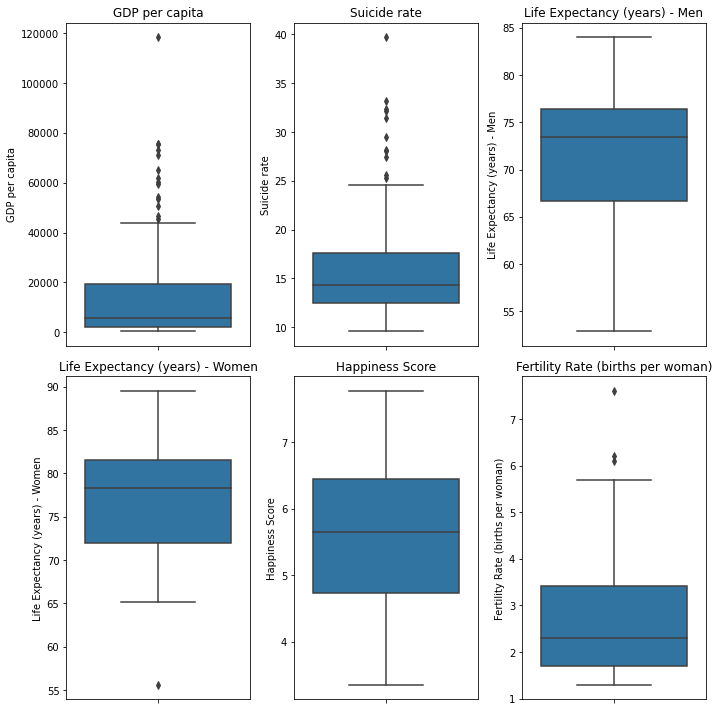

In [5]:
import matplotlib.pyplot as plt
col=['GDP per capita', 'Suicide rate','Life Expectancy (years) - Men','Life Expectancy (years) - Women', 'Happiness Score','Fertility Rate (births per woman)']
fig = plt.figure(figsize=(10,10))

for i in range(len(col)):
    plt.subplot(2,3,i+1)
    plt.title(col[i])
    sns.boxplot(data=newdf2,y=newdf2[col[i]])

plt.tight_layout()
plt.show()

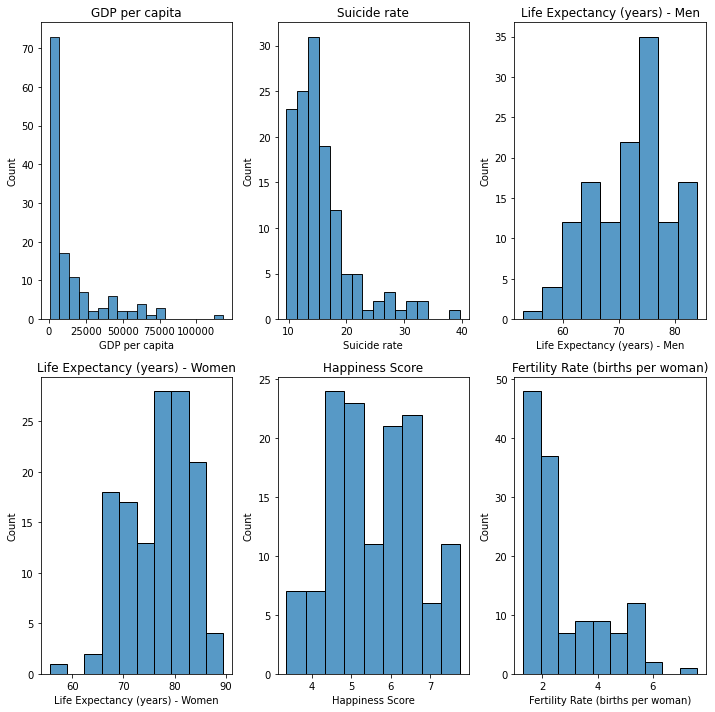

In [6]:
fig = plt.figure(figsize=(10,10))

for i in range(len(col)):
    plt.subplot(2,3,i+1)
    plt.title(col[i])
    sns.histplot(data=newdf2,x=newdf2[col[i]])

plt.tight_layout()
plt.show()

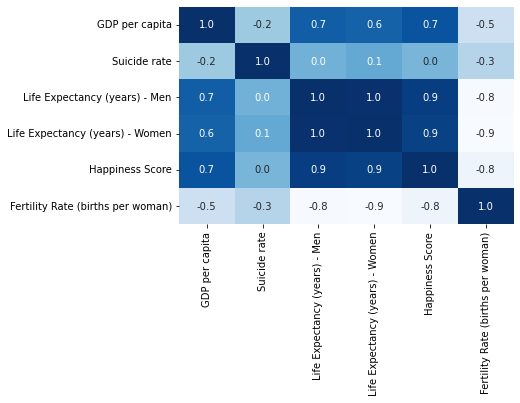

In [7]:
sns.heatmap(newdf2.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f');

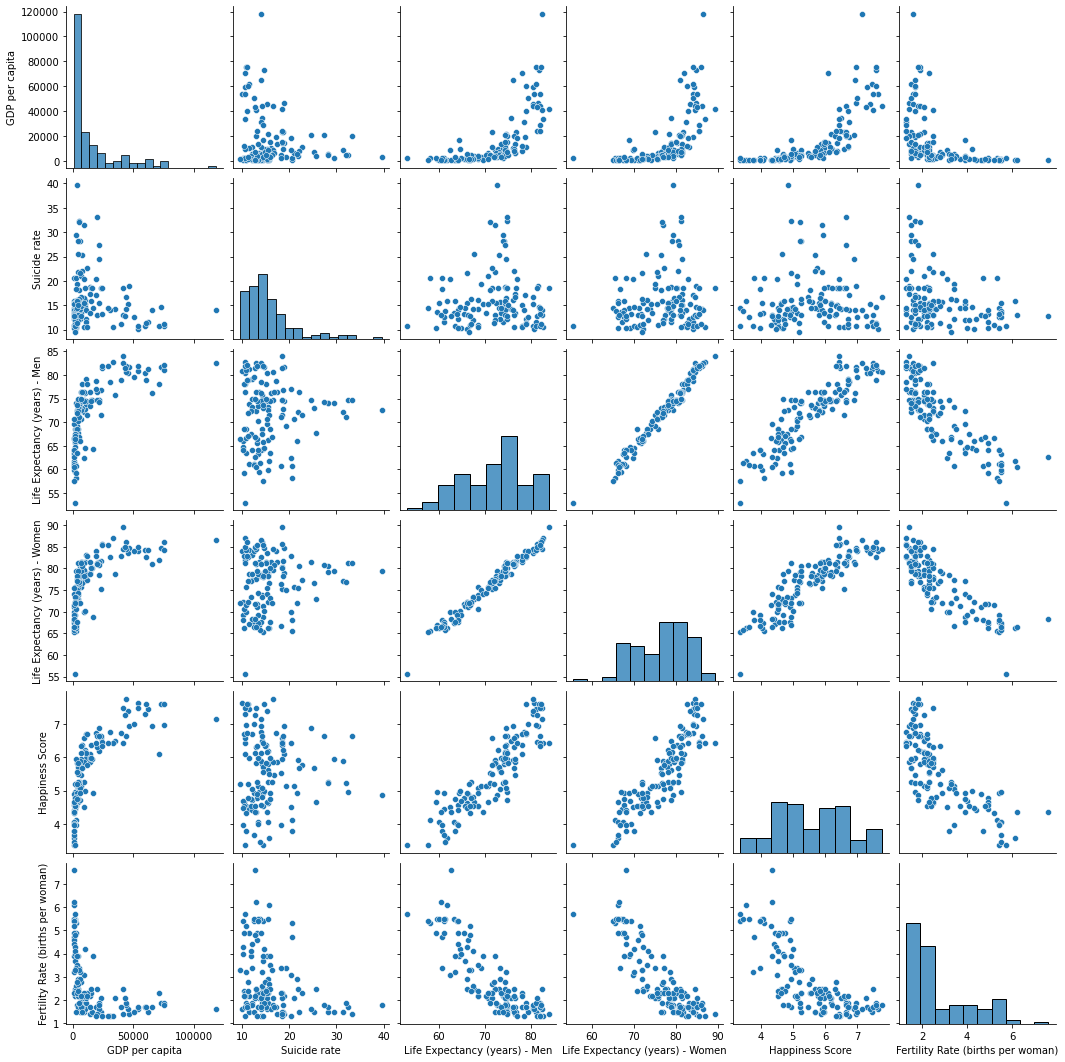

In [8]:
sns.pairplot(newdf2);

In [9]:
import seaborn as sns

headings = sui.columns.tolist()
data = sui.values.tolist()
headings2 = life.columns.tolist()
data2 = life.values.tolist()

headings7 = newdf2.columns.tolist()
data7 = newdf2.values.tolist()

headings8 = newdf3.columns.tolist()
data8 = newdf3.values.tolist()

headings3 = newdf.columns.tolist()
data3 = newdf.values.tolist()#



cor=sui.corr()
corr=pd.DataFrame(cor)
adress=["GDP per capita","Suicide rate"]
corr[""]=adress
corrr=corr.iloc[:,[2,0,1]]
headings4 = corrr.columns.tolist()
data4 = corrr.values.tolist()#

cor1=life.corr()
corr1=pd.DataFrame(cor1)
adress1=["Life Expectancy (years) - Men","Life Expectancy (years) - Women","Happiness Score","Fertility Rate (births per woman)"]
corr1[""]=adress1
corrr1=corr1.iloc[:,[4,0,1,2,3]]
headings5 = corrr1.columns.tolist()
data5 = corrr1.values.tolist()#

cor2=newdf2.corr()
corr2=pd.DataFrame(cor2)
adress2=["GDP per capita","Suicide rate","Life Expectancy (years) - Men","Life Expectancy (years) - Women","Happiness Score","Fertility Rate (births per woman)"]
corr2[""]=adress2
corrr2=corr2.iloc[:,[6,0,1,2,3,4,5]]
headings6 = corrr2.columns.tolist()
data6 = corrr2.values.tolist()#




In [10]:
cor

,GDP per capita,Suicide rate,
GDP per capita,1.000000,-0.176704,GDP per capita
Suicide rate,-0.176704,1.000000,Suicide rate


In [11]:
cor1

,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman),
Life Expectancy (years) - Men,1.000000,0.986424,0.885471,-0.843142,Life Expectancy (years) - Men
Life Expectancy (years) - Women,0.986424,1.000000,0.868632,-0.856585,Life Expectancy (years) - Women
Happiness Score,0.885471,0.868632,1.000000,-0.743444,Happiness Score
Fertility Rate (births per woman),-0.843142,-0.856585,-0.743444,1.000000,Fertility Rate (births per woman)


In [12]:
cor2

,GDP per capita,Suicide rate,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman),
GDP per capita,1.000000,-0.154748,0.671999,0.639335,0.748846,-0.462330,GDP per capita
Suicide rate,-0.154748,1.000000,0.047746,0.112386,0.011332,-0.295012,Suicide rate
Life Expectancy (years) - Men,0.671999,0.047746,1.000000,0.986859,0.894045,-0.842587,Life Expectancy (years) - Men
Life Expectancy (years) - Women,0.639335,0.112386,0.986859,1.000000,0.882351,-0.855950,Life Expectancy (years) - Women
Happiness Score,0.748846,0.011332,0.894045,0.882351,1.000000,-0.757311,Happiness Score
Fertility Rate (births per woman),-0.462330,-0.295012,-0.842587,-0.855950,-0.757311,1.000000,Fertility Rate (births per woman)


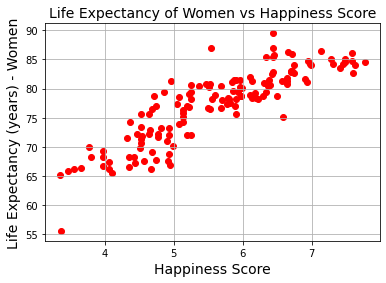

In [13]:
#interface code

import PySimpleGUI as sg
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def bargraph():
    def create_bargraph():
        fig = plt.figure(figsize=(10,10))

        for i in range(len(col)):
            plt.subplot(2,3,i+1)
            plt.title(col[i])
            sns.histplot(data=newdf2,x=newdf2[col[i]])
             
        return plt.gcf()
    def draw2(canvas, figure):
        figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
                    
        figure_canvas_agg.draw()
        
        figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=True)
        return figure_canvas_agg
    
    layout7= [[sg.Text("Bar Graph", key="new",size=(100,1))],[sg.Canvas(key='-CANVAS2-',size=(1000, 1000))]]
    window = sg.Window("", layout7, modal=True,size=(700,500),finalize=True,element_justification='center',resizable=True)
    draw2(window['-CANVAS2-'].TKCanvas, create_bargraph())
    
    choice = None
  
    while True:
        event, values = window.read()
        if event == sg.WIN_CLOSED:
            break
    window.close()

def scattergraph(x,y):
    def create_scatter(x, y):
        plt.scatter(x, y, color='red', marker='o')
        plt.title(a, fontsize=14)
        plt.xlabel(b, fontsize=14)
        plt.ylabel(c, fontsize=14)
        plt.grid(True)     
        return plt.gcf()
    def draw(canvas, figure):
        figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)                    
        figure_canvas_agg.draw()        
        figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=True)
        return figure_canvas_agg    
    layout5= [[sg.Text("Graph", key="new",size=(100,1))],[sg.Canvas(key='-CANVAS-',size=(100, 100))]]
    window = sg.Window("", layout5, modal=True,size=(500,400),finalize=True,element_justification='center',resizable=True)
    draw(window['-CANVAS-'].TKCanvas, create_scatter(x, y))    
    choice = None  
    while True:
        event, values = window.read()
        if event == "Exit" or event == sg.WIN_CLOSED:
            break
    window.close()

def pairplot():
    def create_pairplot():
        sns.pairplot(newdf2);
             
        return plt.gcf()
    def draw1(canvas, figure):
        figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
                    
        figure_canvas_agg.draw()
        
        figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=True)
        return figure_canvas_agg
    
    layout6= [[sg.Text("Graph", key="new",size=(100,1))],[sg.Canvas(key='-CANVAS1-',size=(1000, 1000))]]
    window = sg.Window("", layout6, modal=True,size=(700,500),finalize=True,element_justification='center',resizable=True)
    draw1(window['-CANVAS1-'].TKCanvas, create_pairplot())
    
    choice = None
  
    while True:
        event, values = window.read()
        if event == sg.WIN_CLOSED:
            break
    window.close()



    
table= sg.Table(data, headings=headings,justification='left', key='-table-',size=(200,200))
table2=sg.Table(data2, headings=headings2,justification='left', key='-table2-',size=(200,300))
table3=sg.Table(data3, headings=headings3,justification='left', key='-table3-',size=(200,100))
table4=sg.Table(data4,headings=headings4,justification='left', key='-table4-',size=(5,5))
table5=sg.Table(data5,headings=headings5,justification='right', key='-table5-',size=(100,100))
table6=sg.Table(data6,headings=headings6,justification='right', key='-table6-',size=(100,100))
table7=sg.Table(data7,headings=headings7,justification='right', key='-table7-',size=(100,100))
table8=sg.Table(data8,headings=headings8,justification='right', key='-table8-',size=(100,100))


sg.theme('DarkTeal2')  #sg.theme_list(),sg.theme_previewer()
layout1=[[sg.Text('Suicide Rate and Life Expectancy Data',size=(700,1),justification='c')],
         [sg.Button("Suicide Rate Data"),sg.Button("Life Expectancy Data"),sg.Button("Combined Raw Data"),sg.Button("Cleaned Data"),sg.Button("Removed Data")],
         [sg.Column([[table]], scrollable=False,visible=False, key='-COL-'),sg.Column([[table2]], scrollable=True,visible=False, key='-COL2-'),
          sg.Column([[table3]], scrollable=True,visible=False, key='-COL3-'),sg.Column([[table7]], scrollable=True,visible=False, key='-COL7-'),
          sg.Column([[table8]], scrollable=True,visible=False, key='-COL8-')]]

layout2=[[sg.Text('Suicide Rate Analysis',size=(700,1),justification='c')],
         [sg.Button("Correlation Table1"),sg.Button("GDP per capita vs Suicide rate")],[sg.Column([[table4]], scrollable=False,visible=False, key='-COL4-')]]

layout3=[[sg.Text('Life Expectancy Rate Analysis',size=(700,1),justification='c')],
         [sg.Button("Correlation Table2"),sg.Button("Life Expectancy of Men vs Women"),
          sg.Button("Life Expectancy of Women vs Happiness Score")],
         [sg.Button("Life Expectancy of Men vs Happiness Score"),
          sg.Button("Happiness Score vs Fertility Rate")],
         [sg.Column([[table5]], scrollable=True,visible=False, key='-COL5-')]]
        
layout4=[[sg.Text('Suicide and Life Expectancy Rate Analysis',size=(700,1),justification='c')],
         [sg.Button("Correlation Table3"),sg.Button("pair plot"),sg.Button("Bar Graph")],
         [sg.Column([[table6]], scrollable=True,visible=False, key='-COL6-')]]
        

tabgrp = [[sg.TabGroup([[sg.Tab('Given Data', layout1),
                         sg.Tab('Sucide Rate', layout2),
                         sg.Tab('Life Expectancy', layout3),
                         sg.Tab('Combined Analysis', layout4)]])]]
window=sg.Window("Python Project",tabgrp, size=(700,500),resizable=True)
#event,values= window.read()
while True:
    x=0
    y=0
    event,values= window.read()
    if event == "Exit" or event == sg.WIN_CLOSED:
            break
    if event=="Suicide Rate Data":
        window['-COL2-'].Update(visible=False)
        window['-COL-'].Update(visible=True)
        window['-COL3-'].Update(visible=False)
        window['-COL7-'].Update(visible=False)
        window['-COL8-'].Update(visible=False)
    elif event=="Life Expectancy Data":
        window['-COL-'].Update(visible=False)
        window['-COL2-'].Update(visible=True)
        window['-COL3-'].Update(visible=False)
        window['-COL7-'].Update(visible=False)
        window['-COL8-'].Update(visible=False)
    elif event=="Combined Raw Data":
        window['-COL-'].Update(visible=False)
        window['-COL2-'].Update(visible=False)
        window['-COL3-'].Update(visible=True)
        window['-COL7-'].Update(visible=False)
        window['-COL8-'].Update(visible=False)
    elif event=="Cleaned Data":
        window['-COL-'].Update(visible=False)
        window['-COL2-'].Update(visible=False)
        window['-COL3-'].Update(visible=False)
        window['-COL7-'].Update(visible=True)
        window['-COL8-'].Update(visible=False)
    elif event=="Removed Data":
        window['-COL-'].Update(visible=False)
        window['-COL2-'].Update(visible=False)
        window['-COL3-'].Update(visible=False)
        window['-COL7-'].Update(visible=False)
        window['-COL8-'].Update(visible=True)
    elif event=="Correlation Table1":
        window['-COL4-'].Update(visible=True)
    elif event=="Correlation Table2":
        window['-COL5-'].Update(visible=True)
    elif event=="GDP per capita vs Suicide rate":
        plt.clf()
        x= sui[['GDP per capita']].values.tolist()
        y= sui[['Suicide rate']].values.tolist()
        a='GDP per capita vs Suicide rate'
        b='GDP per capita '
        c='suicide rate'  
        layout5= [[sg.Text("Graph", key="new",size=(100,1))],[sg.Canvas(key='-CANVAS-',size=(100, 100))]]
        scattergraph(x,y)
    elif event=="Life Expectancy of Men vs Women":
        plt.clf()
        x= life[['Life Expectancy (years) - Men']].values.tolist()
        y= life[['Life Expectancy (years) - Women']].values.tolist()
        a='Life Expectancy of Men vs Women'
        b='Life Expectancy (years) - Men'
        c='Life Expectancy (years) - Women'        
        scattergraph(x,y)
    elif event=="Life Expectancy of Women vs Happiness Score":
        plt.clf()
        x= life[['Happiness Score']].values.tolist()
        y= life[['Life Expectancy (years) - Women']].values.tolist()
        a='Life Expectancy of Women vs Happiness Score'
        b='Happiness Score'
        c='Life Expectancy (years) - Women'
        scattergraph(x,y)
    elif event=="Life Expectancy of Men vs Happiness Score":
        plt.clf()
        x= life[['Happiness Score']].values.tolist()
        y= life[['Life Expectancy (years) - Men']].values.tolist()
        a='Life Expectancy of Men vs Happiness Score'
        b='Happiness Score'
        c='Life Expectancy (years) - Men'        
        scattergraph(x,y)
    elif event=="Happiness Score vs Fertility Rate":
        plt.clf()
        x= life[['Happiness Score']].values.tolist()
        y= life[['Fertility Rate (births per woman)']].values.tolist()
        a='Happiness Score vs Fertility Rate (births per woman)'
        b='Happiness Score'
        c='Fertility Rate (births per woman)'       
        scattergraph(x,y)
    elif event=="Correlation Table3":
        window['-COL6-'].Update(visible=True)         
    elif event=="pair plot":
        pairplot()
        
    elif event=="Bar Graph":
        bargraph()            
window.close()


In [17]:
sort=newdf.sort_values(by=['Suicide rate'],ascending=False)
sort.head()

,Country,GDP per capita,Suicide rate,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
7,Armenia,3456.0,39.7,72.6,79.4,4.853,1.8
91,Latvia,19945.0,33.2,74.8,81.3,6.646,1.4
1,Albania,4932.0,32.4,74.8,81.3,4.959,1.7
111,Mongolia,4927.0,32.1,71.1,76.8,5.225,1.9
15,Belarus,8749.0,31.4,72.2,77.0,5.892,1.5


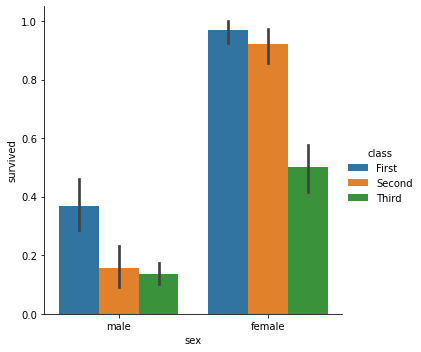

In [15]:
titanic = sns.load_dataset("titanic")
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")